In [88]:
using Plots

include("environments.jl")
include("tabularLearning.jl")

tabular_sarsa_control (generic function with 5 methods)

In [2]:
track = Racetrack("racetrack.csv")

11111111111111111111
11111333333111111111
11111000000111111111
11110000000111111111
11110000000111111111
11110000000111111111
11110000000111111111
11110000000111111111
11110000000111111111
11100000000111111111
11100000000111111111
11100000000111111111
11100000000111111111
11100000000111111111
11100000000111111111
11100000000111111111
11100000000111111111
11000000000111111111
11000000000111111111
11000000000111111111
11000000000111111111
11000000000111111111
11000000000111111111
11000000000111111111
11000000000111111111
11000000000111111111
11000000000111111111
11000000000111111111
11000000000111111111
11000000000111111111
11000000000111111111
11000000000111111111
11000000000011111111
11000000000001111111
11000000000000222221
11000000000000222221
11000000000000222221
11100000000000222221
11100000000000222221
11100000000000222221
11110000000000222221
11110000000000111111
11111100000001111111
11111111111111111111


Racetrack(Int32[1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1], 44, 20, DiscreteSpace(Int32[7]), DiscreteSpace(Int32[44, 20, 6, 6]), Int32[2, 11, 1, 1], (2, 11), Tuple{Int32, Int32}[(0, 0), (-1, 0), (1, 0), (0, -1), (0, 1), (1, 1), (-1, -1)])

In [3]:
reset!(track)
mc_perf = tabular_montecarlo_control(track)

****************************************************************************************************

100-element Vector{Any}:
    -1.748047e6
   200.0
   200.0
   200.0
   200.0
 -5499.0
 -5310.0
 -9680.0
   200.0
   200.0
   200.0
   200.0
   200.0
     ⋮
    91.0
  -195.0
 -1406.0
   200.0
   200.0
   200.0
   200.0
 -2940.0
 -3009.0
   200.0
 -6441.0
  -130.0

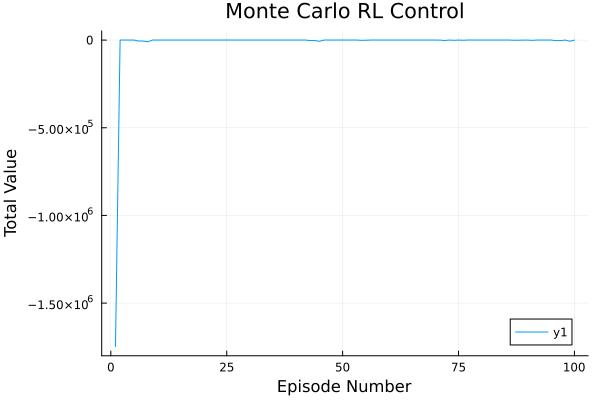

In [4]:
plot(1:length(mc_perf), mc_perf)
title!("Monte Carlo RL Control")
xlabel!("Episode Number")
ylabel!("Total Value")

In [5]:
reset!(track)
sarsa_perf = tabular_sarsa_control(track)

****************************************************************************************************

100-element Vector{Any}:
 -84776.0
    200.0
    200.0
    200.0
    200.0
    200.0
    200.0
    200.0
    200.0
    200.0
  -7477.0
    200.0
  -7150.0
      ⋮
    200.0
    200.0
    200.0
    200.0
    200.0
    200.0
    200.0
    200.0
  -2836.0
    200.0
   -133.0
  -1140.0

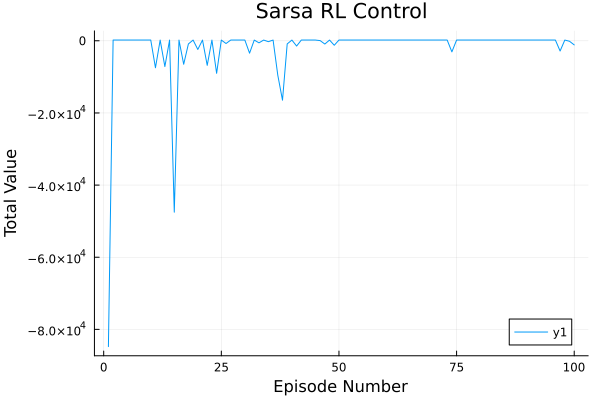

In [6]:
plot(1:length(sarsa_perf), sarsa_perf)
title!("Sarsa RL Control")
xlabel!("Episode Number")
ylabel!("Total Value")

In [118]:
cart = DiscreteCartpole(20)
reset!(cart)
sarsa_perf = tabular_sarsa_control(cart, 0.2, 1000)
reset!(cart)
mc_perf = tabular_montecarlo_control(cart, 1000)

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

1000-element Vector{Any}:
 29.0
 12.0
 34.0
 15.0
 14.0
 13.0
 13.0
 20.0
 14.0
 24.0
 10.0
 18.0
  9.0
  ⋮
 11.0
  9.0
 10.0
 10.0
 11.0
 12.0
 14.0
  9.0
 10.0
 14.0
 12.0
 12.0

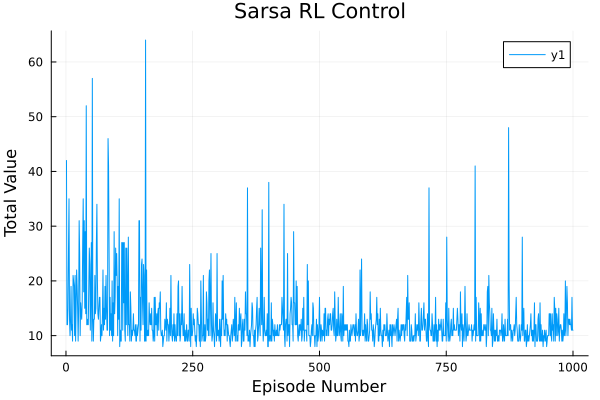

In [119]:
plot(1:length(sarsa_perf), sarsa_perf)
title!("Sarsa RL Control")
xlabel!("Episode Number")
ylabel!("Total Value")

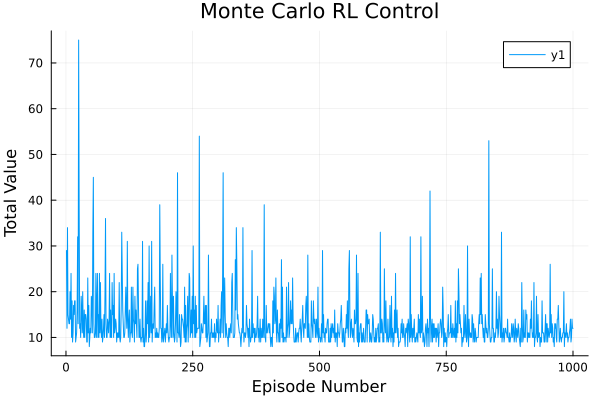

In [120]:
plot(1:length(mc_perf), mc_perf)
title!("Monte Carlo RL Control")
xlabel!("Episode Number")
ylabel!("Total Value")